# Classification using Logistic Regression

Logistic regression, a type of supervised learning, is used for classification, whereas linear regression is used for prediction. Basically, it takes input and determines how it should be classified. For instance, should the input be classified as pass/fail, win/lose, alive/dead, or healthy/sick.  The input is assigned a probability of belonging to a certain class.  The model may determine that a set of specific input values has a 90% probability that it belongs to the pass class and 10% probability that it belongs to the fail class.  From this, it is classified as pass.  The probability always adds up to 100% (or 1.0).

![title](./images/Logistic_Regression_Overview.jpeg)

<center>From https://www.equiskill.com/understanding-logistic-regression/</center>

In [1]:
# Imports
from IPython.display import Image
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd  
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns 
import sklearn
from sklearn import datasets, metrics
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_predict 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import statsmodels.api as sm

%matplotlib inline

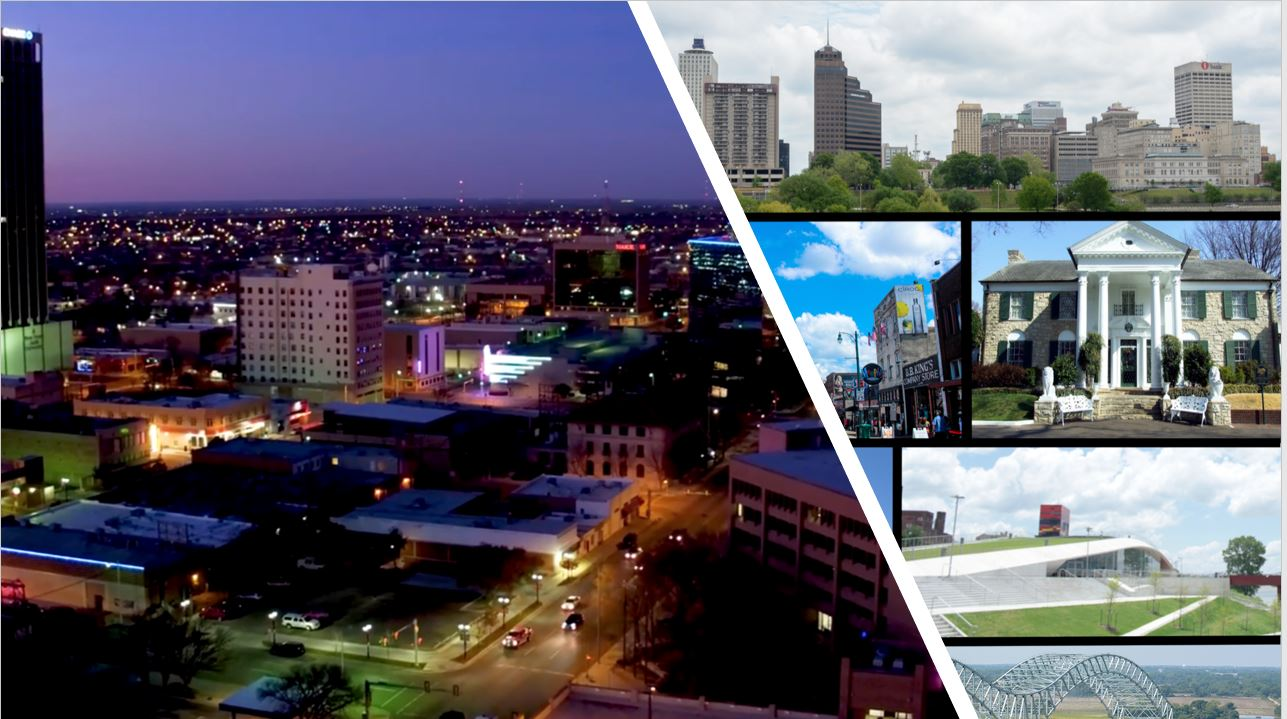

In [11]:
Image("images/Memphis-Amarillo.JPG")

<center><h7>Images from https://en.wikipedia.org/wiki/Memphis,_Tennessee and https://en.wikipedia.org/wiki/Amarillo,_Texas</h7></center>

## Using logistic regression to classify houses as being located in specific zip codes in Amarillo, TX, or Memphis, TN.

### First, import the dataset and display some basic statistics and graphs

***Overview of data***

     SF   Price  Beds  Baths  Year_Built  Lot_Size_Acres  Garage_Size  \
0  1020  110000     2    1.0        1950            0.17            0   
1   982   39900     3    1.0        1940            0.17            0   
2  1466  149000     3    2.0        1977            0.19            0   

   Stories  Brick  City  
0        1      1     0  
1        1      0     0  
2        1      1     0  

***Ranges and means for features for Memphis***

Square footage ranges from 750 to 2,482.  Mean is 1,421.
Price ranges from $15,000 to $319,000. Mean is $118,647.
Number of bedrooms ranges from 2 to 5.
Number of baths ranges from 1 to 4.
Year built ranges from 1921 to 2002.
Garage size ranges from 0 to 2.
Number of stories ranges from 1 to 2.
Lot size ranges from 0.07 to 0.95 acres. Mean is 0.21.

***Ranges and means for features for Amarillo***

Square footage ranges from 855 to 2,456.  Mean is 1,424.
Price ranges from $18,610 to $139,900. Mean is $86,005.
Number of bedr

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



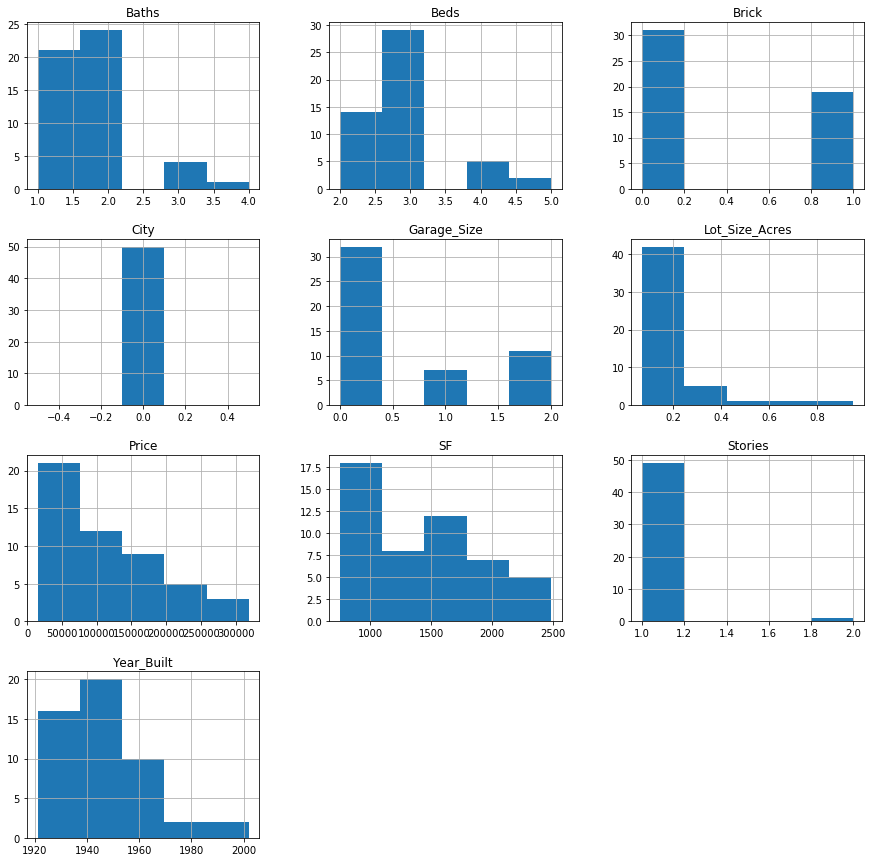



***Histograms of Amarillo data***


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



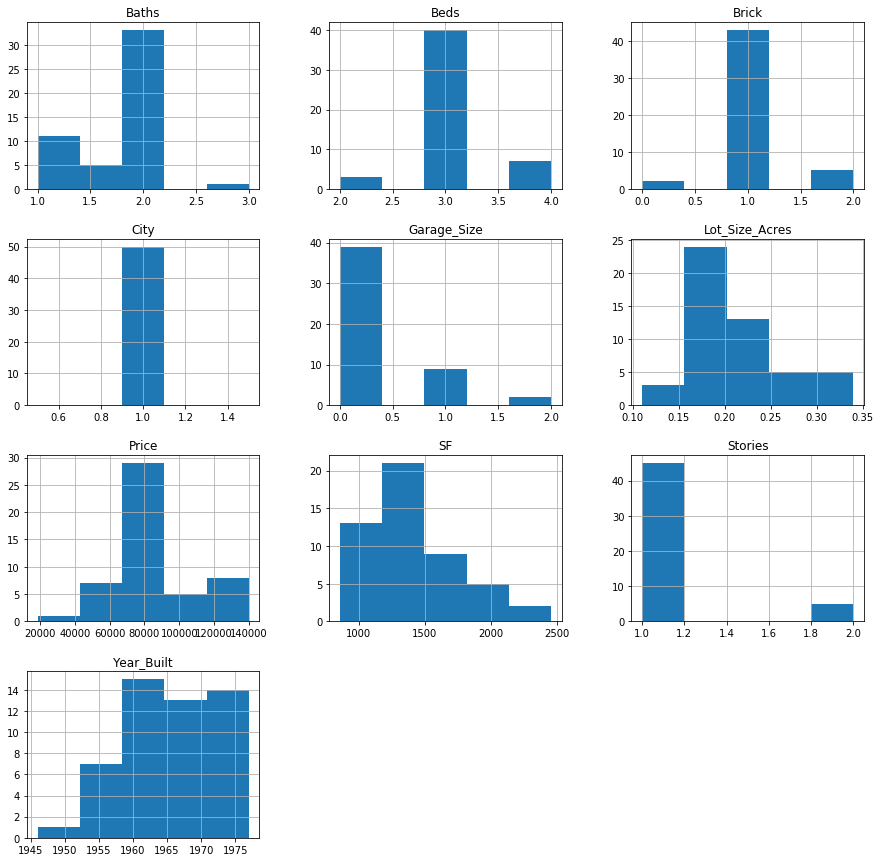

Finished


In [2]:
# Import data for houses in Memphis in the 38118 zip code and Amarillo in the 79106 area for Logistic Regression
cols=["SF","Price","Beds","Baths","Year_Built","Lot_Size_Acres","Garage_Size","Stories","Brick","City"]
City_Log_Reg_df = pd.read_csv('data/Logistic_Regression_Memphis_vs_Amarillo.csv', names=cols)

# View the first few lines of data
print("***Overview of data***\n")
print(City_Log_Reg_df.head(3))

# Display some information about the data
# Memphis
print("\n***Ranges and means for features for Memphis***\n")
print("Square footage ranges from {:,d} to {:,d}.  Mean is {:,d}.".format(City_Log_Reg_df["SF"].loc[City_Log_Reg_df["City"] == 0].min(), 
                                                                           City_Log_Reg_df["SF"].loc[City_Log_Reg_df["City"] == 0].max(), 
                                                                           int(City_Log_Reg_df["SF"].loc[City_Log_Reg_df["City"] == 0].mean())))
print("Price ranges from ${:,d} to ${:,d}. Mean is ${:,d}.".format(City_Log_Reg_df["Price"].loc[City_Log_Reg_df["City"] == 0].min(), 
                                                                   City_Log_Reg_df["Price"].loc[City_Log_Reg_df["City"] == 0].max(), 
                                                                   int(City_Log_Reg_df["Price"].loc[City_Log_Reg_df["City"] == 0].mean())))
print("Number of bedrooms ranges from {:,d} to {:,d}.".format(City_Log_Reg_df["Beds"].loc[City_Log_Reg_df["City"] == 0].min(), 
                                                              City_Log_Reg_df["Beds"].loc[City_Log_Reg_df["City"] == 0].max()))
print("Number of baths ranges from {:,d} to {:,d}.".format(int(City_Log_Reg_df["Baths"].loc[City_Log_Reg_df["City"] == 0].min()), 
                                                           int(City_Log_Reg_df["Baths"].loc[City_Log_Reg_df["City"] == 0].max())))
print("Year built ranges from {:d} to {:d}.".format(City_Log_Reg_df["Year_Built"].loc[City_Log_Reg_df["City"] == 0].min(), 
                                                    City_Log_Reg_df["Year_Built"].loc[City_Log_Reg_df["City"] == 0].max()))
print("Garage size ranges from {:d} to {:d}.".format(City_Log_Reg_df["Garage_Size"].loc[City_Log_Reg_df["City"] == 0].min(), 
                                                     City_Log_Reg_df["Garage_Size"].loc[City_Log_Reg_df["City"] == 0].max()))
print("Number of stories ranges from {:d} to {:d}.".format(City_Log_Reg_df["Stories"].loc[City_Log_Reg_df["City"] == 0].min(), 
                                                           City_Log_Reg_df["Stories"].loc[City_Log_Reg_df["City"] == 0].max()))
print("Lot size ranges from {:.2f} to {:.2f} acres. Mean is {:.2f}.".format(City_Log_Reg_df["Lot_Size_Acres"].loc[City_Log_Reg_df["City"] == 0].min(), 
                                                                            City_Log_Reg_df["Lot_Size_Acres"].loc[City_Log_Reg_df["City"] == 0].max(), 
                                                                            City_Log_Reg_df["Lot_Size_Acres"].loc[City_Log_Reg_df["City"] == 0].mean()))

# Amarillo
print("\n***Ranges and means for features for Amarillo***\n")
print("Square footage ranges from {:,d} to {:,d}.  Mean is {:,d}.".format(City_Log_Reg_df["SF"].loc[City_Log_Reg_df["City"] == 1].min(), 
                                                                           City_Log_Reg_df["SF"].loc[City_Log_Reg_df["City"] == 1].max(), 
                                                                           int(City_Log_Reg_df["SF"].loc[City_Log_Reg_df["City"] == 1].mean())))
print("Price ranges from ${:,d} to ${:,d}. Mean is ${:,d}.".format(City_Log_Reg_df["Price"].loc[City_Log_Reg_df["City"] == 1].min(), 
                                                                   City_Log_Reg_df["Price"].loc[City_Log_Reg_df["City"] == 1].max(), 
                                                                   int(City_Log_Reg_df["Price"].loc[City_Log_Reg_df["City"] == 1].mean())))
print("Number of bedrooms ranges from {:,d} to {:,d}.".format(City_Log_Reg_df["Beds"].loc[City_Log_Reg_df["City"] == 1].min(), 
                                                              City_Log_Reg_df["Beds"].loc[City_Log_Reg_df["City"] == 1].max()))
print("Number of baths ranges from {:,d} to {:,d}.".format(int(City_Log_Reg_df["Baths"].loc[City_Log_Reg_df["City"] == 1].min()), 
                                                           int(City_Log_Reg_df["Baths"].loc[City_Log_Reg_df["City"] == 1].max())))
print("Year built ranges from {:d} to {:d}.".format(City_Log_Reg_df["Year_Built"].loc[City_Log_Reg_df["City"] == 1].min(), 
                                                    City_Log_Reg_df["Year_Built"].loc[City_Log_Reg_df["City"] == 1].max()))
print("Garage size ranges from {:d} to {:d}.".format(City_Log_Reg_df["Garage_Size"].loc[City_Log_Reg_df["City"] == 1].min(), 
                                                     City_Log_Reg_df["Garage_Size"].loc[City_Log_Reg_df["City"] == 1].max()))
print("Number of stories ranges from {:d} to {:d}.".format(City_Log_Reg_df["Stories"].loc[City_Log_Reg_df["City"] == 1].min(), 
                                                           City_Log_Reg_df["Stories"].loc[City_Log_Reg_df["City"] == 1].max()))
print("Lot size ranges from {:.2f} to {:.2f} acres. Mean is {:.2f}.".format(City_Log_Reg_df["Lot_Size_Acres"].loc[City_Log_Reg_df["City"] == 1].min(), 
                                                                            City_Log_Reg_df["Lot_Size_Acres"].loc[City_Log_Reg_df["City"] == 1].max(), 
                                                                            City_Log_Reg_df["Lot_Size_Acres"].loc[City_Log_Reg_df["City"] == 1].mean()))


# Plot histograms of the data
print("\n\n***Histograms of Memphis data***")
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
hist = City_Log_Reg_df.loc[City_Log_Reg_df["City"] == 0].hist(bins=5, ax = ax)
plt.show()

print("\n\n***Histograms of Amarillo data***")
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
hist = City_Log_Reg_df.loc[City_Log_Reg_df["City"] == 1].hist(bins=5, ax = ax)
plt.show()

print("Finished")

### Let's create a model to classify the house as being in Memphis (38118) or Amarillo (79106)
* We will do this using Logistic Regression and the model will use all of the features in the dataset.
* We will divide our data up into 2 groups - train and testing. 80% will be in train, 20% will be test.

In [3]:
# Reshape our data so it is in a usable format (convert to numpy array)
# We need to drop the City column from the X_train data frame because that is what we are trying to predict
# Another way to do this, which was done in the multivariable linear regression section of the Regression notebook,
# is to list out all the columns rather than dropping City. Either way works.
X_train = City_Log_Reg_df.drop("City", axis=1).values
y_train = City_Log_Reg_df["City"].values

# Create train/test splits
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# The features do not need to be scaled (standardized) with logistic regression like they were with linear regression
# Train the model using L2 (Lasso) regularization, but you could also try L1 (Ridge) regularization
LogReg = LogisticRegression(penalty = 'l2')
LogReg.fit(X_train, y_train)

print("Finished")

Finished


### Make predictions based on the model we just created and see how well it performs.
* The 2 classes are 0 and 1.  0 means the house is in Memphis, 1 means the house is in Amarillo.
* A confusion matrix will show how each house was classified.


***Actual City vs the Predicted City with Probabilities***

Actual City	Predicted City	Prob Mem	Prob Amar
Memphis         Amarillo	0.29		0.71
Amarillo	Amarillo	0.38		0.62
Memphis         Memphis         0.83		0.17
Amarillo	Amarillo	0.45		0.55
Amarillo	Amarillo	0.35		0.65
Amarillo	Amarillo	0.38		0.62
Memphis         Memphis         0.91		0.09
Amarillo	Memphis         0.65		0.35
Amarillo	Amarillo	0.22		0.78
Amarillo	Amarillo	0.50		0.50
Amarillo	Amarillo	0.35		0.65
Amarillo	Amarillo	0.46		0.54
Amarillo	Amarillo	0.50		0.50
Memphis         Memphis         0.66		0.34
Memphis         Memphis         1.00		0.00
Memphis         Memphis         0.68		0.32
Memphis         Memphis         0.95		0.05
Memphis         Memphis         0.88		0.12
Memphis         Amarillo	0.04		0.96
Memphis         Memphis         0.70		0.30


***Confusion Matrix***



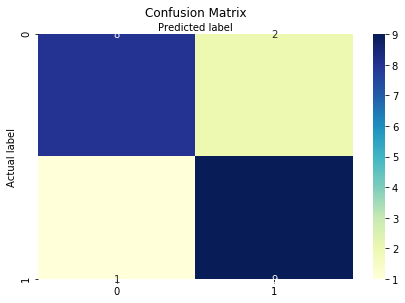



***Confusion Matrix Details***

8 houses that are in Memphis (class 0) were classified as in Memphis.
2 houses that are in Memphis were classified as in Amarillo.
1 houses that are in Amarillo (class 1) were classified as in Memphis.
9 houses that are in Amarillo were classified as in Amarillo.


***The accuracy of the logistic regression classifier on the test set is 0.85.***


***Classification Report Metrics***

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20

Finished


In [4]:
# Make the predictions
y_pred = LogReg.predict(X_test)

# Get the probabilites for each predictions
y_pred_probs = LogReg.predict_proba(X_test)

# Print the actual class, the predicted class, and the probabilities for the prediction
print("\n***Actual City vs the Predicted City with Probabilities***\n")
print("Actual City\tPredicted City\tProb Mem\tProb Amar")
line_to_print = ''
for i in range(0,len(y_test)):
    line_to_print = ''
    if(y_test[i] == 1):
        line_to_print = line_to_print + "Amarillo\t"
    else:
        line_to_print = line_to_print + "Memphis         "
        
    if(y_pred[i] == 1):
        line_to_print = line_to_print + "Amarillo\t"
        line_to_print = line_to_print + "{:0.2f}\t\t{:0.2f}".format(y_pred_probs[i][0],y_pred_probs[i][1])
    else:
        line_to_print = line_to_print + "Memphis         "
        line_to_print = line_to_print + "{:0.2f}\t\t{:0.2f}".format(y_pred_probs[i][0],y_pred_probs[i][1])

    print(line_to_print)

# Generate the confusion matrix data
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print("\n\n***Confusion Matrix***\n")
# Prepare the plot
class_names=["0","1"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


# Print additional info for the confusion matrix
print("\n\n***Confusion Matrix Details***")
print("\n" + str(confusion_matrix[0][0]) + " houses that are in Memphis (class 0) were classified as in Memphis.")
print(str(confusion_matrix[0][1]) + " houses that are in Memphis were classified as in Amarillo.")
print(str(confusion_matrix[1][0]) + " houses that are in Amarillo (class 1) were classified as in Memphis.")
print(str(confusion_matrix[1][1]) + " houses that are in Amarillo were classified as in Amarillo.\n")

print("\n***The accuracy of the logistic regression classifier on the test set is {:.2f}.***\n".format(LogReg.score(X_test, y_test)))

print("\n***Classification Report Metrics***\n")
print(sklearn.metrics.classification_report(y_test, y_pred))

print("Finished")

### Evaluate the AUC
The Area Under the Receiver Operating Curve is a numerical value that tells how well a model can distinguish between the different classes. The higher the AUC, which ranges from 0 to 1, the better the model is performing.  An AUC of 0.5 indicates the model is performing no better than random guessing. 

In the following example, you will see that the model is not performing very well.  How do you think it could be improved?

In [5]:
# Calculate the AUC and draw the ROC curve

# Get the predicted probabilities and other data needed for the AUC and ROC curve
y_pred_auc = y_pred_probs[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_auc)
auc = metrics.roc_auc_score(y_test, y_pred_auc)

# Draw the ROC curve
fig = go.Figure(data=go.Scatter(x=fpr, y=tpr))
fig.update_layout(title="AUC - {:.3f}".format(auc),
                   xaxis_title="False Positive Rate",
                   yaxis_title="True Positive Rate")
fig.show()

print("\nThe AUC is {:.3f}.".format(auc))

 


The AUC is 0.810.


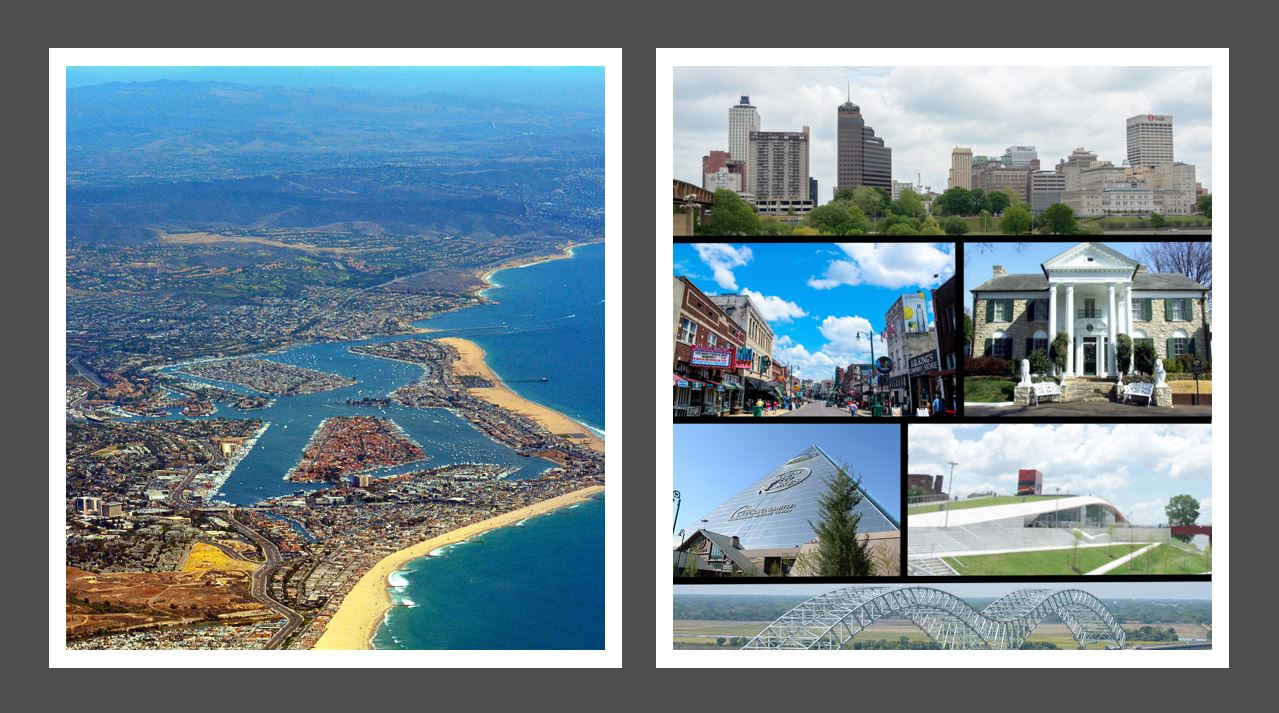

In [13]:
Image("images/Memphis-Newport_Beach.JPG")

<center><h7>Images from https://en.wikipedia.org/wiki/Memphis,_Tennessee and https://en.wikipedia.org/wiki/Newport_Beach,_California</h7></center>

### Let's try with Memphis vs. Newport Beach, CA - an incredibly expensive city!
It's very easy to see the incredible difference in the price scale!  Class 0 is Memphis, Class 1 is Newport Beach.

We will use do same steps as we did above for classifying Memphis or Amarillo.

In [6]:
# Import data for houses in Memphis in the 38118 zip code and Newport Beach, CA, area for simple linear regression
cols=["SF","Price","Beds","Baths","Year_Built","Lot_Size_Acres","Garage_Size","Stories","Brick","City"]
City_Log_Reg_df = pd.read_csv('data/Logistic_Regression_Memphis_vs_Newport_Beach.csv', names=cols)

# Create scatterplot showing house prices as a function of square footage in Memphis and Newport Beach
fig = px.scatter(City_Log_Reg_df, x="SF", y="Price", color=City_Log_Reg_df["City"].astype(str))
fig.update_xaxes(title_text='SF')
fig.update_yaxes(title_text='Price ($)')
fig.update_layout(title_text='House prices as function of SF in Memphis & Newport Beach-Blue=Memphis, Red=Newport Beach', title_x=0.5)
fig.show()



***Overview of data***

     SF  Price  Beds  Baths  Year_Built  Lot_Size_Acres  Garage_Size  Stories  \
0  1182  18610     2    1.5        1974            0.11            1        2   
1  1439  73500     3    2.0        1977            0.18            0        1   
2   855  55667     2    1.0        1955            0.17            0        1   

   Brick  City  
0      1     0  
1      1     0  
2      1     0  

***Ranges and means for features for Memphis***

Square footage ranges from 855 to 2,456.  Mean is 1,424.
Price ranges from $18,610 to $139,900. Mean is $86,005.
Number of bedrooms ranges from 2 to 4.
Number of baths ranges from 1 to 3.
Year built ranges from 1946 to 1977.
Garage size ranges from 0 to 2.
Number of stories ranges from 1 to 2.
Lot size ranges from 0.11 to 0.34 acres. Mean is 0.21.

***Ranges and means for features for Newport Beach***

Square footage ranges from 954 to 2,500.  Mean is 1,783.
Price ranges from $373,000 to $6,495,000. Mean is $1,823,346.
Number 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



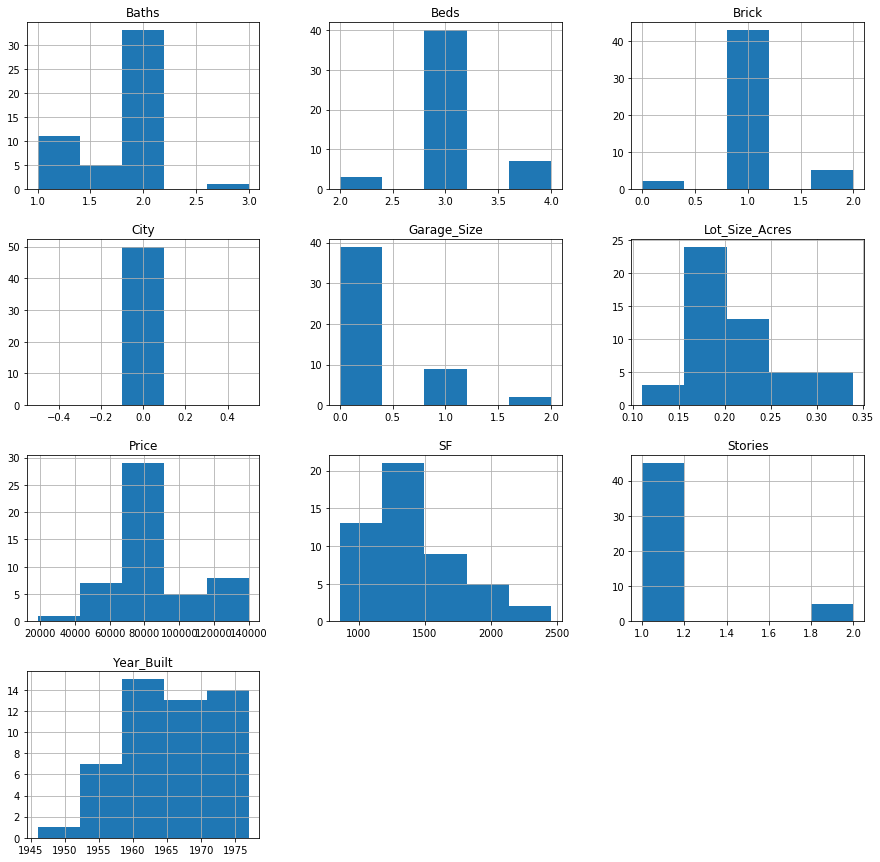



***Histograms of Newport Beach data***


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



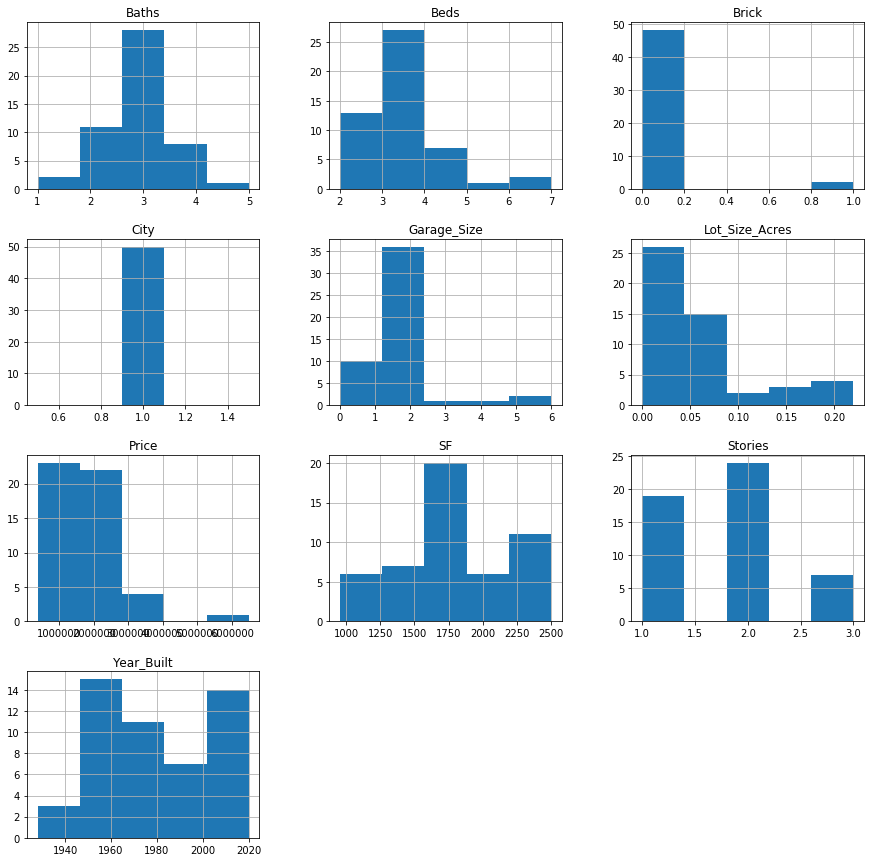


***Actual City vs the Predicted City with Probabilities***

Actual City	Predicted City	Prob Mem	Prob Newport Beach
Newport Beach	Newport Beach	0.00		1.00
Newport Beach	Newport Beach	0.00		1.00
Newport Beach	Newport Beach	0.00		1.00
Memphis         Memphis         1.00		0.00
Memphis         Memphis         1.00		0.00
Memphis         Memphis         1.00		0.00
Memphis         Memphis         1.00		0.00
Newport Beach	Newport Beach	0.00		1.00
Memphis         Memphis         1.00		0.00
Memphis         Memphis         1.00		0.00
Memphis         Memphis         1.00		0.00
Memphis         Memphis         1.00		0.00
Newport Beach	Newport Beach	0.00		1.00
Memphis         Memphis         1.00		0.00
Newport Beach	Newport Beach	0.00		1.00
Memphis         Memphis         1.00		0.00
Newport Beach	Newport Beach	0.00		1.00
Newport Beach	Newport Beach	0.00		1.00
Memphis         Memphis         1.00		0.00
Memphis         Memphis         1.00		0.00


***Confusion Matrix***



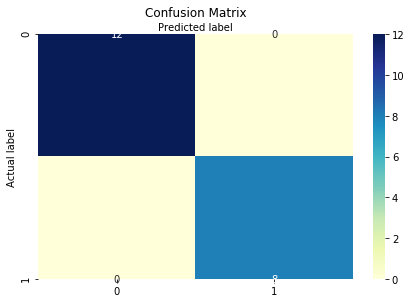



***Confusion Matrix Details***

12 houses that are in Memphis (class 0) were classified as in Memphis.
0 houses that are in Memphis were classified as in Newport Beach.
0 houses that are in Newport Beach (class 1) were classified as in Memphis.
8 houses that are in Newport Beach were classified as in Newport Beach.


***The accuracy of the logistic regression classifier on the test set is 1.00.***


***Classification Report Metrics***

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Finished


In [7]:
# See the first few lines of data
print("\n***Overview of data***\n")
print(City_Log_Reg_df.head(3))

# Display some information about the data
# Memphis
print("\n***Ranges and means for features for Memphis***\n")
print("Square footage ranges from {:,d} to {:,d}.  Mean is {:,d}.".format(City_Log_Reg_df["SF"].loc[City_Log_Reg_df["City"] == 0].min(), 
                                                                           City_Log_Reg_df["SF"].loc[City_Log_Reg_df["City"] == 0].max(), 
                                                                           int(City_Log_Reg_df["SF"].loc[City_Log_Reg_df["City"] == 0].mean())))
print("Price ranges from ${:,d} to ${:,d}. Mean is ${:,d}.".format(City_Log_Reg_df["Price"].loc[City_Log_Reg_df["City"] == 0].min(), 
                                                                   City_Log_Reg_df["Price"].loc[City_Log_Reg_df["City"] == 0].max(), 
                                                                   int(City_Log_Reg_df["Price"].loc[City_Log_Reg_df["City"] == 0].mean())))
print("Number of bedrooms ranges from {:,d} to {:,d}.".format(City_Log_Reg_df["Beds"].loc[City_Log_Reg_df["City"] == 0].min(), 
                                                              City_Log_Reg_df["Beds"].loc[City_Log_Reg_df["City"] == 0].max()))
print("Number of baths ranges from {:,d} to {:,d}.".format(int(City_Log_Reg_df["Baths"].loc[City_Log_Reg_df["City"] == 0].min()), 
                                                           int(City_Log_Reg_df["Baths"].loc[City_Log_Reg_df["City"] == 0].max())))
print("Year built ranges from {:d} to {:d}.".format(City_Log_Reg_df["Year_Built"].loc[City_Log_Reg_df["City"] == 0].min(), 
                                                    City_Log_Reg_df["Year_Built"].loc[City_Log_Reg_df["City"] == 0].max()))
print("Garage size ranges from {:d} to {:d}.".format(City_Log_Reg_df["Garage_Size"].loc[City_Log_Reg_df["City"] == 0].min(), 
                                                     City_Log_Reg_df["Garage_Size"].loc[City_Log_Reg_df["City"] == 0].max()))
print("Number of stories ranges from {:d} to {:d}.".format(City_Log_Reg_df["Stories"].loc[City_Log_Reg_df["City"] == 0].min(), 
                                                           City_Log_Reg_df["Stories"].loc[City_Log_Reg_df["City"] == 0].max()))
print("Lot size ranges from {:.2f} to {:.2f} acres. Mean is {:.2f}.".format(City_Log_Reg_df["Lot_Size_Acres"].loc[City_Log_Reg_df["City"] == 0].min(), 
                                                                            City_Log_Reg_df["Lot_Size_Acres"].loc[City_Log_Reg_df["City"] == 0].max(), 
                                                                            City_Log_Reg_df["Lot_Size_Acres"].loc[City_Log_Reg_df["City"] == 0].mean()))

# Newport Beach
print("\n***Ranges and means for features for Newport Beach***\n")
print("Square footage ranges from {:,d} to {:,d}.  Mean is {:,d}.".format(City_Log_Reg_df["SF"].loc[City_Log_Reg_df["City"] == 1].min(), 
                                                                           City_Log_Reg_df["SF"].loc[City_Log_Reg_df["City"] == 1].max(), 
                                                                           int(City_Log_Reg_df["SF"].loc[City_Log_Reg_df["City"] == 1].mean())))
print("Price ranges from ${:,d} to ${:,d}. Mean is ${:,d}.".format(City_Log_Reg_df["Price"].loc[City_Log_Reg_df["City"] == 1].min(), 
                                                                   City_Log_Reg_df["Price"].loc[City_Log_Reg_df["City"] == 1].max(), 
                                                                   int(City_Log_Reg_df["Price"].loc[City_Log_Reg_df["City"] == 1].mean())))
print("Number of bedrooms ranges from {:,d} to {:,d}.".format(City_Log_Reg_df["Beds"].loc[City_Log_Reg_df["City"] == 1].min(), 
                                                              City_Log_Reg_df["Beds"].loc[City_Log_Reg_df["City"] == 1].max()))
print("Number of baths ranges from {:,d} to {:,d}.".format(int(City_Log_Reg_df["Baths"].loc[City_Log_Reg_df["City"] == 1].min()), 
                                                           int(City_Log_Reg_df["Baths"].loc[City_Log_Reg_df["City"] == 1].max())))
print("Year built ranges from {:d} to {:d}.".format(City_Log_Reg_df["Year_Built"].loc[City_Log_Reg_df["City"] == 1].min(), 
                                                    City_Log_Reg_df["Year_Built"].loc[City_Log_Reg_df["City"] == 1].max()))
print("Garage size ranges from {:d} to {:d}.".format(City_Log_Reg_df["Garage_Size"].loc[City_Log_Reg_df["City"] == 1].min(), 
                                                     City_Log_Reg_df["Garage_Size"].loc[City_Log_Reg_df["City"] == 1].max()))
print("Number of stories ranges from {:d} to {:d}.".format(City_Log_Reg_df["Stories"].loc[City_Log_Reg_df["City"] == 1].min(), 
                                                           City_Log_Reg_df["Stories"].loc[City_Log_Reg_df["City"] == 1].max()))
print("Lot size ranges from {:.2f} to {:.2f} acres. Mean is {:.2f}.".format(City_Log_Reg_df["Lot_Size_Acres"].loc[City_Log_Reg_df["City"] == 1].min(), 
                                                                            City_Log_Reg_df["Lot_Size_Acres"].loc[City_Log_Reg_df["City"] == 1].max(), 
                                                                            City_Log_Reg_df["Lot_Size_Acres"].loc[City_Log_Reg_df["City"] == 1].mean()))


# Plot histograms of the data
print("\n\n***Histograms of Memphis data***")
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
hist = City_Log_Reg_df.loc[City_Log_Reg_df["City"] == 0].hist(bins=5, ax = ax)
plt.show()

print("\n\n***Histograms of Newport Beach data***")
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
hist = City_Log_Reg_df.loc[City_Log_Reg_df["City"] == 1].hist(bins=5, ax = ax)
plt.show()


# Convert the dataframe to a NumPy array, and split it into a training and test set
X_train = City_Log_Reg_df.drop("City", axis=1).values
y_train = City_Log_Reg_df["City"].values

# Create train/test splits
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model
LogReg = LogisticRegression(penalty = 'l2')
LogReg.fit(X_train, y_train)

# Make the predictions
y_pred = LogReg.predict(X_test)

# Get the probabilites for each predictions
y_pred_probs = LogReg.predict_proba(X_test)

# Print the actual class, the predicted class, and the probabilities for the prediction
print("\n***Actual City vs the Predicted City with Probabilities***\n")
print("Actual City\tPredicted City\tProb Mem\tProb Newport Beach")
line_to_print = ''
for i in range(0,len(y_test)):
    line_to_print = ''
    if(y_test[i] == 1):
        line_to_print = line_to_print + "Newport Beach\t"
    else:
        line_to_print = line_to_print + "Memphis         "
        
    if(y_pred[i] == 1):
        line_to_print = line_to_print + "Newport Beach\t"
        line_to_print = line_to_print + "{:0.2f}\t\t{:0.2f}".format(y_pred_probs[i][0],y_pred_probs[i][1])
    else:
        line_to_print = line_to_print + "Memphis         "
        line_to_print = line_to_print + "{:0.2f}\t\t{:0.2f}".format(y_pred_probs[i][0],y_pred_probs[i][1])

    print(line_to_print)

# Generate the confusion matrix data
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print("\n\n***Confusion Matrix***\n")
# Prepare the plot
class_names=["0","1"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Print additional info for the confusion matrix
print("\n\n***Confusion Matrix Details***")
print("\n" + str(confusion_matrix[0][0]) + " houses that are in Memphis (class 0) were classified as in Memphis.")
print(str(confusion_matrix[0][1]) + " houses that are in Memphis were classified as in Newport Beach.")
print(str(confusion_matrix[1][0]) + " houses that are in Newport Beach (class 1) were classified as in Memphis.")
print(str(confusion_matrix[1][1]) + " houses that are in Newport Beach were classified as in Newport Beach.\n")

print("\n***The accuracy of the logistic regression classifier on the test set is {:.2f}.***\n".format(LogReg.score(X_test, y_test)))

print("\n***Classification Report Metrics***\n")
print(sklearn.metrics.classification_report(y_test, y_pred))

print("Finished")

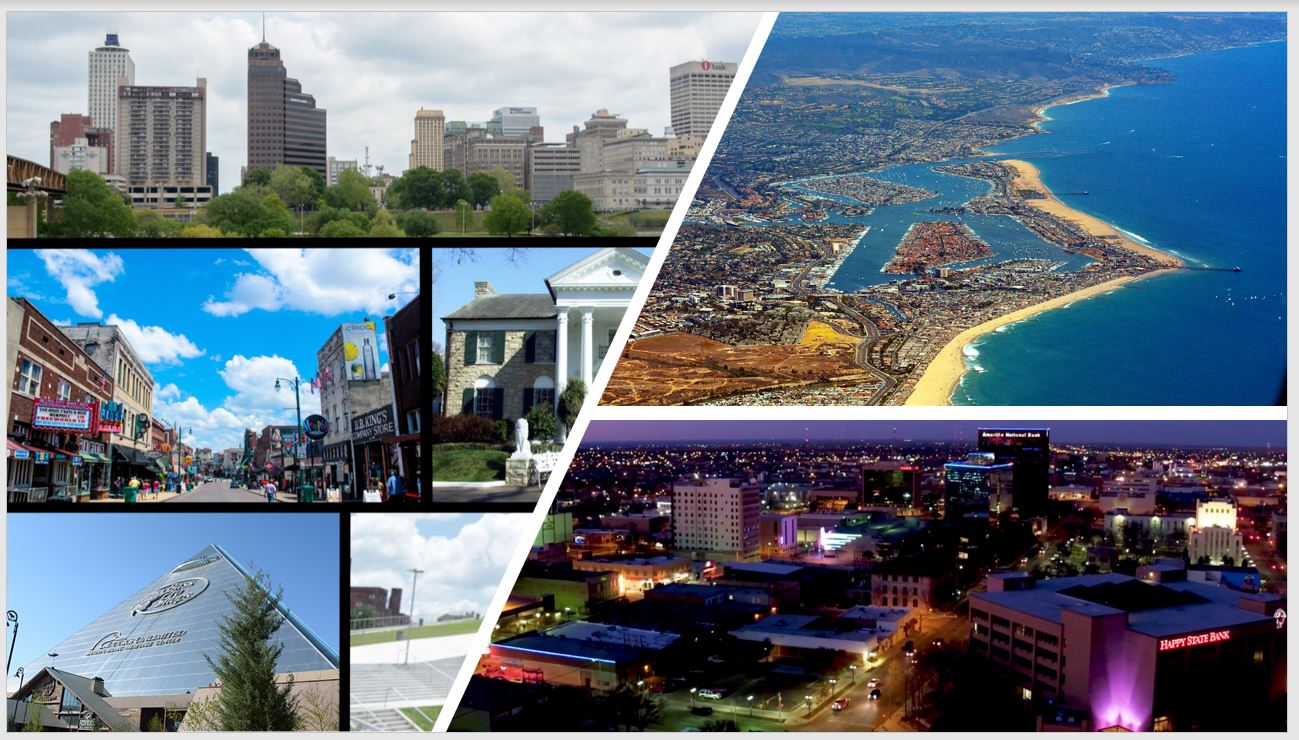

In [14]:
Image("images/Memphis-Amarillo-Newport_Beach.JPG")

# Using multinomial (multi-class) regression to classify the city a house is located in using the variables from above. The houses can be located in Memphis, Amarillo, or Newport Beach.

### We are using a new dataset.  The dataset has 50 houses for each city.


In [8]:
# Import data for houses in Memphis, Amarillo, and Newport Beach
cols=["SF","Price","Beds","Baths","Year_Built","Lot_Size_Acres","Garage_Size","Stories","Brick","City"]
Mult_Reg_df = pd.read_csv('data/Multinomial_Regression.csv', names=cols)

# View the first few lines of data
print("***Overview of data***\n")
print(Mult_Reg_df.head(3))

print("\nFinished")

***Overview of data***

     SF  Price  Beds  Baths  Year_Built  Lot_Size_Acres  Garage_Size  Stories  \
0  1182  18610     2    1.5        1974            0.11            1        2   
1  1439  73500     3    2.0        1977            0.18            0        1   
2   855  55667     2    1.0        1955            0.17            0        1   

   Brick  City  
0      1     0  
1      1     0  
2      1     0  

Finished


### Let's create a model to classify where the house is located
* We will do this using Multinomial Regression and the model will use all of the attributes from the Logistic Regression section above.
* We will divide our data up into 2 groups - the training group and testing group. 80% will be in training, 20% in testing.
* There are 50 houses for each city.

In [9]:
# Convert the dataframe to a NumPy array, and split it into a training and test set
X_train = Mult_Reg_df.drop("City", axis=1).values
y_train = Mult_Reg_df["City"].values

# Create train/test splits
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Create the regressor and train the model
# There are many hyperparameters that can be set for LogisticRegression.  I recommend looking at the 
# sklearn documentation for full details.  
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
MultReg = LogisticRegression(random_state=0, multi_class='multinomial', max_iter=7600)
MultReg.fit(X_train, y_train)

print("Finished")

Finished


### Make predictions based on the model we just created and see how well it performs.
* The 3 classes are 0, 1, and 2.  0 means the house is in Memphis, 1 means the house is in Amarillo, and 2 means the house is in Newport Beach.
* A confusion matrix will show how each house was classified.



***Confusion Matrix***



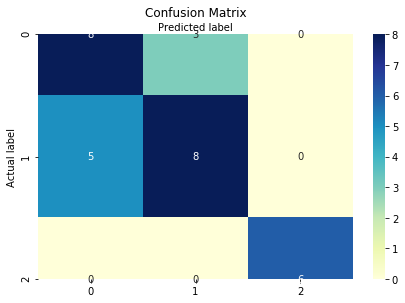


***The accuracy of the multinomial regression classifier on the test set is 0.73.***


***Classification Report Metrics***

              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.73      0.62      0.67        13
           2       1.00      1.00      1.00         6

    accuracy                           0.73        30
   macro avg       0.78      0.78      0.78        30
weighted avg       0.74      0.73      0.73        30


Finished


In [10]:
# Make the predictions
y_pred = MultReg.predict(X_test)

# Get the probabilites for each predictions
y_pred_probs = MultReg.predict_proba(X_test)


# Generate the confustion matrix data
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print("\n\n***Confusion Matrix***\n")
# Prepare the plot
class_names=["0","1", "2"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("\n***The accuracy of the multinomial regression classifier on the test set is {:.2f}.***\n".format(MultReg.score(X_test, y_test)))

print("\n***Classification Report Metrics***\n")
print(sklearn.metrics.classification_report(y_test, y_pred))

print("\nFinished")

Credits
* https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
* www.plotly.com
* https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/
* https://www.statisticshowto.com/rmse/
* https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm#coefficients
* All the house information came from www.zillow.com
* https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75
* https://medium.com/datadriveninvestor/k-nearest-neighbors-knn-7b4bd0128da7
* https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
* https://www.kaggle.com/crowemi/iris-classification-k-nearest-neighbors
* https://www.datasciencecentral.com/profiles/blogs/classification-and-regression-trees
* https://towardsdatascience.com/decision-tree-classification-de64fc4d5aac
* https://towardsdatascience.com/how-to-visualize-a-decision-tree-in-5-steps-19781b28ffe2


Last updated 9/14/20